In [17]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
def plot_confusion_matrix(y_actu, y_pred, title='Confusion matrix', cmap=plt.cm.gray_r):
    
    df_confusion = pd.crosstab(y_actu, y_pred.reshape(y_pred.shape[0],), rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    df_conf_norm = df_confusion / df_confusion.sum(axis=1)
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
def predict(X, Y, W, b, word_to_vec_map):
    """
    Given X (sentences) and Y (emoji indices), predict emojis and compute the accuracy of your model over the given set.
    
    Arguments:
    X -- input data containing sentences, numpy array of shape (m, None)
    Y -- labels, containing index of the label emoji, numpy array of shape (m, 1)
    
    Returns:
    pred -- numpy array of shape (m, 1) with your predictions
    """
    m = X.shape[0]
    pred = np.zeros((m, 1))
    
    for j in range(m):                       # Loop over training examples
        
        # Split jth test example (sentence) into list of lower case words
        words = X[j].lower().split()
        
        # Average words' vectors
        avg = np.zeros((50,))
        for w in words:
            avg += word_to_vec_map[w]
        avg = avg/len(words)

        # Forward propagation
        Z = np.dot(W, avg) + b
        A = softmax(Z)
        pred[j] = np.argmax(A)
        
    print("Accuracy: "  + str(np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))))
    
    return pred
def print_predictions(X, pred):
    print()
    for i in range(X.shape[0]):
        print(X[i], label_to_emoji(int(pred[i])))

In [19]:
X_train, Y_train = read_csv('dataset.csv')
X_test, Y_test = read_csv('dataset.csv')

In [20]:
maxLen = len(max(X_train, key=len).split())
print(X_train.shape[0])

53


In [21]:
index = 11
print(X_train[index], Y_train[index])

I AM NOT ABLE TO MAKE PAYMENT THROUGH MY DEBIT OR CREDIT CARD . AN ERROR MESSAGE WAS SHOWN THAT " THIS CARD IS NOT RECOGNISED " . 0


In [22]:
Y_oh_train = convert_to_one_hot(Y_train, C = 3)
Y_oh_test = convert_to_one_hot(Y_test, C = 3)

In [23]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [24]:
word = "cucumber"
index = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(index) + "th word in the vocabulary is", index_to_word[index])
print(word_to_vec_map['cucumber'])

the index of cucumber in the vocabulary is 113317
the 289846th word in the vocabulary is potatos
[ 0.68224  -0.31608  -0.95201   0.47108   0.56571   0.13151   0.22457
  0.094995 -1.3237   -0.51545  -0.39337   0.88488   0.93826   0.22931
  0.088624 -0.53908   0.23396   0.73245  -0.019123 -0.26552  -0.40433
 -1.5832    1.1316    0.4419   -0.48218   0.4828    0.14938   1.1245
  1.0159   -0.50213   0.83831  -0.31303   0.083242  1.7161    0.15024
  1.0324   -1.5005    0.62348   0.54508  -0.88484   0.53279  -0.085119
  0.02141  -0.56629   1.1463    0.6464    0.78318  -0.067662  0.22884
 -0.042453]


In [25]:
# GRADED FUNCTION: sentence_to_avg

def sentence_to_avg(sentence, word_to_vec_map):
    """
    Converts a sentence (string) into a list of words (strings). Extracts the GloVe representation of each word
    and averages its value into a single vector encoding the meaning of the sentence.
    
    Arguments:
    sentence -- string, one training example from X
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    
    Returns:
    avg -- average vector encoding information about the sentence, numpy-array of shape (50,)
    """
    
    ### START CODE HERE ###
    # Step 1: Split sentence into list of lower case words (≈ 1 line)
    words = [i.lower() for i in sentence.split()]

    # Initialize the average word vector, should have the same shape as your word vectors.
    avg = np.zeros((50,))
    
    # Step 2: average the word vectors. You can loop over the words in the list "words".
    for w in words:
        avg += word_to_vec_map[w]
    avg = avg / len(words)
    
    ### END CODE HERE ###
    
    return avg

In [26]:
avg = sentence_to_avg("I APPLIED FOR A CREDIT CARD LAST MONTH BUT I DID NOT GET THAT ONE TILL NOW ALTHOUGH I FULLFILL ALL THE CRITERIA REQUIRED FOR APPLYING CREDIT CARD .", word_to_vec_map)
print("avg = ", avg)

avg =  [ 9.79850345e-02  6.93903255e-02  7.25572103e-02 -2.08946586e-01
  2.75334507e-01  1.13997762e-01 -4.29399655e-01  9.09981034e-03
 -1.38489042e-01  2.66702103e-03  1.36158241e-01  2.53767952e-01
 -3.89884138e-01 -1.53686724e-01  6.51387224e-01  2.87995717e-01
 -4.88895172e-02 -1.67267034e-01 -1.02404000e-01 -4.59334241e-01
  9.36202414e-02  1.57892414e-02  1.86638966e-01 -3.98122759e-02
  5.77247931e-02 -1.60734345e+00 -3.42556352e-01 -5.60501379e-02
  2.02296241e-01 -3.38956000e-01  3.18666207e+00  3.20533324e-01
 -3.49764448e-01 -2.22568879e-01  1.52854694e-01 -5.15690552e-02
  3.21971690e-01  2.53166172e-01  1.12600124e-01 -3.92765207e-01
 -1.10599441e-01 -5.53567241e-02  6.32271448e-02  3.52763621e-01
 -2.59805793e-01 -1.14892503e-01 -5.03173828e-02  1.94792834e-01
  3.76594828e-02  1.22308076e-01]


In [46]:
X_train, Y_train = read_csv('train.csv')
X_test, Y_test = read_csv('test.csv')
for i in range(X_train.shape[0]):
    print(i)
    avg = sentence_to_avg(X_train[i], word_to_vec_map)
    #print("avg = ", avg)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [47]:
# GRADED FUNCTION: model

def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 150):
    """
    Model to train word vector representations in numpy.
    
    Arguments:
    X -- input data, numpy array of sentences as strings, of shape (m, 1)
    Y -- labels, numpy array of integers between 0 and 7, numpy-array of shape (m, 1)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    learning_rate -- learning_rate for the stochastic gradient descent algorithm
    num_iterations -- number of iterations
    
    Returns:
    pred -- vector of predictions, numpy-array of shape (m, 1)
    W -- weight matrix of the softmax layer, of shape (n_y, n_h)
    b -- bias of the softmax layer, of shape (n_y,)
    """
    
    np.random.seed(1)

    # Define number of training examples
    m = Y.shape[0]                          # number of training examples
    n_y = 3                                 # number of classes  
    n_h = 50                                # dimensions of the GloVe vectors 
    
    # Initialize parameters using Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # Convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y, C = n_y) 
    
    # Optimization loop
    for t in range(num_iterations):                       # Loop over the number of iterations
        for i in range(m):                                # Loop over the training examples
            
            ### START CODE HERE ### (≈ 4 lines of code)
            # Average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)

            # Forward propagate the avg through the softmax layer
            z = np.dot(W, avg) + b
            a = softmax(z)

            # Compute cost using the i'th training label's one hot representation and "A" (the output of the softmax)
            cost = -np.sum(np.multiply(Y_oh[i], np.log(a)))
            ### END CODE HERE ###
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b

In [48]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(3)[Y_train.reshape(-1)].shape)
print(X_train[0])
print(type(X_train))
print(np.eye(3)[Y_train.reshape(-1)].shape)
print(type(X_train))

(79,)
(79,)
(79, 3)
I APPLIED FOR A CREDIT CARD LAST MONTH BUT I DID NOT GET THAT ONE TILL NOW . ALTHOUGH I FULLFILL ALL THE CRITERIA REQUIRED FOR APPLYING CREDIT CARD .
<class 'numpy.ndarray'>
(79, 3)
<class 'numpy.ndarray'>


In [49]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 0.9824050052952049
Accuracy: 0.4177215189873418
Epoch: 100 --- cost = 0.5079142560624624
Accuracy: 0.9493670886075949
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [50]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9620253164556962
Test set:
Accuracy: 0.7142857142857143


In [51]:
#X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
#Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

#pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
#print_predictions(X_my_sentences, pred)

(21,)
            0      1      2     
Predicted  0.0  1.0  2.0  All
Actual                       
0            8    1    0    9
1            0    5    0    5
2            4    1    2    7
All         12    7    2   21


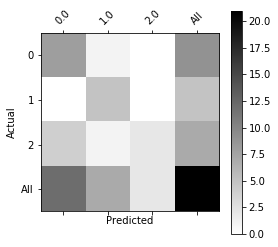

In [53]:
print(Y_test.shape)
print('           '+ ' 0 '+ '    ' + ' 1 ' + '    ' +  ' 2 '+ '    ')
print(pd.crosstab(Y_test, pred_test.reshape(21,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)